**Bu not defteri patika eğitim platformunda bulunan veri bilimi patikasının veri bilimi 101 dersinin son projesi olarak hazırlanmıştır.**

# 1. Introduction

**Competition Description**

Ask a home buyer to describe their dream house, and they probably won't begin with the height of the basement ceiling or the proximity to an east-west railroad. But this playground competition's dataset proves that much more influences price negotiations than the number of bedrooms or a white-picket fence.

With 79 explanatory variables describing (almost) every aspect of residential homes in Ames, Iowa, this competition challenges you to predict the final price of each home.

**Practice Skills**
* Creative feature engineering 
* Advanced regression techniques like random forest and gradient boosting

**Acknowledgments**

The Ames Housing dataset was compiled by Dean De Cock for use in data science education. It's an incredible alternative for data scientists looking for a modernized and expanded version of the often cited Boston Housing dataset. 

# 2. Imports 

We import necessary libraries our notebook

In [480]:
import os 
import math
import numpy as np 
import pandas as pd 
from zipfile import ZipFile
import matplotlib.pyplot as plt

from kaggle.api.kaggle_api_extended import KaggleApi

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error, mean_squared_log_error,mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from sklearn.svm import SVR

# 3. Load Dataset From The Kaggle

This section we will download dataset from kaggle. 
For this you can look in here: 
https://medium.com/@jeff.daniel77/accessing-the-kaggle-com-api-with-jupyter-notebook-on-windows-d6f330bc6953

In [4]:
# Connect to Kaggle with API
# Download json file from your kaggle account 
# Go to directory — “C:\Users\<username>\.kaggle\” — and paste here downloaded JSON file
api = KaggleApi() 
api.authenticate() 

In [5]:
# download dataset from kaggle
!kaggle competitions download -c house-prices-advanced-regression-techniques


  0%|          | 0.00/199k [00:00<?, ?B/s]
100%|##########| 199k/199k [00:00<00:00, 1.70MB/s]
100%|##########| 199k/199k [00:00<00:00, 1.67MB/s]


In [6]:
# Extract the zip file to the folder under the data folder
zf = ZipFile('house-prices-advanced-regression-techniques.zip')
zf.extractall()
zf.close()

# 4. Read Dataset

Next step we will read dataset from file. We have two dataset by train and test.

In [2]:
train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")

In [3]:
train_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
test_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


# 5. Information About Dataset

In this section, we will take a quick look at the information about the data set.

In [37]:
# information about dataset 
# Show non-null count and dtype
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [38]:
# test df information
# Show non-null count and dtype
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

In [39]:
# Correlation with SalePrice
train_df.corr()["SalePrice"].sort_values(ascending = False)

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
Id              -0.021917
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePr

In [40]:
# train data columns number,mean ,std etc.
train_df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [41]:
test_df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
count,1459.000000,1459.000000,1232.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1444.000000,1458.000000,...,1458.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000
mean,2190.000000,57.378341,68.580357,9819.161069,6.078821,5.553804,1971.357779,1983.662783,100.709141,439.203704,...,472.768861,93.174777,48.313914,24.243317,1.794380,17.064428,1.744345,58.167923,6.104181,2007.769705
std,421.321334,42.746880,22.376841,4955.517327,1.436812,1.113740,30.390071,21.130467,177.625900,455.268042,...,217.048611,127.744882,68.883364,67.227765,20.207842,56.609763,30.491646,630.806978,2.722432,1.301740
min,1461.000000,20.000000,21.000000,1470.000000,1.000000,1.000000,1879.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000
25%,1825.500000,20.000000,58.000000,7391.000000,5.000000,5.000000,1953.000000,1963.000000,0.000000,0.000000,...,318.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000
50%,2190.000000,50.000000,67.000000,9399.000000,6.000000,5.000000,1973.000000,1992.000000,0.000000,350.500000,...,480.000000,0.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000
75%,2554.500000,70.000000,80.000000,11517.500000,7.000000,6.000000,2001.000000,2004.000000,164.000000,753.500000,...,576.000000,168.000000,72.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000
max,2919.000000,190.000000,200.000000,56600.000000,10.000000,9.000000,2010.000000,2010.000000,1290.000000,4010.000000,...,1488.000000,1424.000000,742.000000,1012.000000,360.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000


# 6. Preprocessing

In this section we will prepare our train and test dataset for training. Firstly we will look NaN values. After we will decide to what can we do for these NaN values. We will scale  our numerical features so our model can do a better job. 

<ins>**NaN Values Analyze:**</ins> 

**__Train dataset__** 

The values stated here are for the train dataset

 We have total 1460 row, some of columns has 1453, 1406, 1369, 1179, 690 NaN values so we decided  won't take training these columns. For the rest we will fill in with mostly used value.

**These columns:**

     PoolQC 1453 NaN Values
     MiscFeature 1406 NaN Values
     Alley 1369 NaN Values
     Fence 1179 NaN Values
     FireplaceQu 690 NaN Values 

 We saw that the MasVnrType column normally has a value of 8 NaN, but in reality MasVnrType column has 864 None value it wasn't show when we searched null value because "None" was write on that column because this is string type value so i decided to drop this column.

**MasVnrType Column Value Counts:**

     None       864
     BrkFace    445
     Stone      128
     BrkCmn      15

Also we need drop Id column because column has unique values. Our model can be memorize them. This may mislead us in evaluating the model.

**Test dataset**

We have to drop the columns we dropped in the train data in the test. So we can evaluate our model.

* Next step, we will define function. This function purpose is take column name but by numerical and categorical features separately.

In [5]:
# Take column name 
def take_column(df):
    cat_dict = {}
    num_dict = {}
    for cat in df.columns:
        if df[cat].dtype == 'O':
            cat_dict[cat] = df[cat]
        else: 
            num_dict[cat] = df[cat]
    return cat_dict,num_dict

* Next step, we will define function. This function purpose is getting column names with NaN values but by numerical and categorical features separetely. We will take column names to variable.

In [6]:
def check_nan_values(df):
    cat_dict_nan = {}
    num_dict_nan = {}
    
    cat_col,num_col = take_column(df)
    
    for col in cat_col:
        if df.isnull().sum()[col]:
            cat_dict_nan[col] = df.isnull().sum()[col]
            
    for col in num_col:
        if df.isnull().sum()[col]:
            num_dict_nan[col] = df.isnull().sum()[col]
            
    return cat_dict_nan,num_dict_nan

In [7]:
train_cat_nan , train_num_nan = check_nan_values(train_df)
test_cat_nan,test_num_nan = check_nan_values(test_df)

* Next step, function will show NaN values and column name and number of NaN values. 

In [13]:
# Let's look NaN values
def nan_values_print(nan_dict):
    """   
    Dictionary should be given. This function purpose is just for print 
    """
    print("Categorical Variables With Null Values In The Training Set\n")
    print("Columns Name \tNumbers Of NaN")
    print("-"*30)
    for i in range(len(nan_dict)):
        key = list(nan_dict.keys())[i]
        value = list(nan_dict.values())[i]
        print(f"{key}   \t|   {value}")

In [14]:
nan_values_print(train_cat_nan)

Categorical Variables With Null Values In The Training Set

Columns Name 	Numbers Of NaN
------------------------------
Alley   	|   1369
MasVnrType   	|   8
BsmtQual   	|   37
BsmtCond   	|   37
BsmtExposure   	|   38
BsmtFinType1   	|   37
BsmtFinType2   	|   38
Electrical   	|   1
FireplaceQu   	|   690
GarageType   	|   81
GarageFinish   	|   81
GarageQual   	|   81
GarageCond   	|   81
PoolQC   	|   1453
Fence   	|   1179
MiscFeature   	|   1406


In [15]:
nan_values_print(train_num_nan)

Categorical Variables With Null Values In The Training Set

Columns Name 	Numbers Of NaN
------------------------------
LotFrontage   	|   259
MasVnrArea   	|   8
GarageYrBlt   	|   81


In [16]:
nan_values_print(test_cat_nan)

Categorical Variables With Null Values In The Training Set

Columns Name 	Numbers Of NaN
------------------------------
MSZoning   	|   4
Alley   	|   1352
Utilities   	|   2
Exterior1st   	|   1
Exterior2nd   	|   1
MasVnrType   	|   16
BsmtQual   	|   44
BsmtCond   	|   45
BsmtExposure   	|   44
BsmtFinType1   	|   42
BsmtFinType2   	|   42
KitchenQual   	|   1
Functional   	|   2
FireplaceQu   	|   730
GarageType   	|   76
GarageFinish   	|   78
GarageQual   	|   78
GarageCond   	|   78
PoolQC   	|   1456
Fence   	|   1169
MiscFeature   	|   1408
SaleType   	|   1


In [17]:
nan_values_print(test_num_nan)

Categorical Variables With Null Values In The Training Set

Columns Name 	Numbers Of NaN
------------------------------
LotFrontage   	|   227
MasVnrArea   	|   15
BsmtFinSF1   	|   1
BsmtFinSF2   	|   1
BsmtUnfSF   	|   1
TotalBsmtSF   	|   1
BsmtFullBath   	|   2
BsmtHalfBath   	|   2
GarageYrBlt   	|   78
GarageCars   	|   1
GarageArea   	|   1


* Next step, we decided to remove these columns, for the reason we explained above

In [18]:
# These column we want to drop them 
col_to_drop = ["Id","PoolQC","MiscFeature","Alley","Fence","MasVnrType","FireplaceQu"]

* Next step, we will show the number of values of categorical columns that have NaN values.

In [19]:
# Number of values of categorical columns
def value_count_print(df):

    cat_dict, _ = check_nan_values(df)
    
    # Print categorical data with NaN values to the screen
    for cat in cat_dict.keys():
        print("*"*40)
        print(f"{cat}: \nNaN Values Numbers: {df[cat].isnull().sum()}")
        print(f"{df[cat].value_counts().sort_values(ascending=False)}\n")


In [20]:
value_count_print(train_df)

****************************************
Alley: 
NaN Values Numbers: 1369
Grvl    50
Pave    41
Name: Alley, dtype: int64

****************************************
MasVnrType: 
NaN Values Numbers: 8
None       864
BrkFace    445
Stone      128
BrkCmn      15
Name: MasVnrType, dtype: int64

****************************************
BsmtQual: 
NaN Values Numbers: 37
TA    649
Gd    618
Ex    121
Fa     35
Name: BsmtQual, dtype: int64

****************************************
BsmtCond: 
NaN Values Numbers: 37
TA    1311
Gd      65
Fa      45
Po       2
Name: BsmtCond, dtype: int64

****************************************
BsmtExposure: 
NaN Values Numbers: 38
No    953
Av    221
Gd    134
Mn    114
Name: BsmtExposure, dtype: int64

****************************************
BsmtFinType1: 
NaN Values Numbers: 37
Unf    430
GLQ    418
ALQ    220
BLQ    148
Rec    133
LwQ     74
Name: BsmtFinType1, dtype: int64

****************************************
BsmtFinType2: 
NaN Values Numbers: 38
Unf 

In [21]:
value_count_print(test_df)

****************************************
MSZoning: 
NaN Values Numbers: 4
RL         1114
RM          242
FV           74
C (all)      15
RH           10
Name: MSZoning, dtype: int64

****************************************
Alley: 
NaN Values Numbers: 1352
Grvl    70
Pave    37
Name: Alley, dtype: int64

****************************************
Utilities: 
NaN Values Numbers: 2
AllPub    1457
Name: Utilities, dtype: int64

****************************************
Exterior1st: 
NaN Values Numbers: 1
VinylSd    510
MetalSd    230
HdBoard    220
Wd Sdng    205
Plywood    113
CemntBd     65
BrkFace     37
WdShing     30
AsbShng     24
Stucco      18
BrkComm      4
AsphShn      1
CBlock       1
Name: Exterior1st, dtype: int64

****************************************
Exterior2nd: 
NaN Values Numbers: 1
VinylSd    510
MetalSd    233
HdBoard    199
Wd Sdng    194
Plywood    128
CmentBd     66
Wd Shng     43
BrkFace     22
Stucco      21
AsbShng     18
Brk Cmn     15
ImStucc      5
CBlock    

* Next step, we will define two function first function purpose is fill in the blank values. For categorical features, we will fill in that column with the most used values, for numerical features we will fill in with column mean. 


* Second function purpose is preprocessing of dataset for training. We can want it to drop column, use encoder and scaler,
and we can want it fill in the blank values. For fill the blank values it will use first function. 

In [22]:
def fill_nan_values(df): 
    """
    This func fill nan values. 
    For categorical feature we will fill NaN values with that column mostly used value.
    For numerical feature we will fill NaN values with that column median
    Will return df with no NaN value
    """
    cat_dict, num_dict = check_nan_values(df)
    
    for cat_col in cat_dict.keys():     
        val = list(df[cat_col].value_counts().sort_values(ascending=False).to_dict().keys())[0]
        df[cat_col] = df[cat_col].fillna(value = val)
    
    for num_col in num_dict.keys():
        df[num_col] = df[num_col].fillna(df[num_col].mean())
    
    return df

def preprocess(df,drop_col=None,encoder=None,scaler=None,nan_values = False):
    """
    preprocess input data:
    param: df => Dataframe with data
    param: encoder => encoder object with fit_transform method,
    param: scaler => scaler object with fit_transform method,
    param: nan_values => Whether there is a column with NaN
    return df
    """
    if drop_col:
        df = df.drop(col_to_drop,axis = 1) 
        
    cat_columns,num_columns = take_column(df)
    
    if encoder: 
        for cat in cat_columns:
            df[cat] = encoder.fit_transform(df[cat])
    if scaler: 
        num_columns = list(num_columns)
        for col in num_columns:
            if col == 'SalePrice': # drop our label column we don't want to use scaling on.
                num_columns.remove('SalePrice')
            else:
                pass
        df[num_columns] = scaler.fit_transform(df[num_columns])
    if nan_values:
        df = fill_nan_values(df)
            
    return df

In [27]:
# preprocessed datasets
train_data = preprocess(train_df,col_to_drop,LabelEncoder(),StandardScaler(),nan_values = True)
test_data = preprocess(test_df,col_to_drop,LabelEncoder(),StandardScaler(),nan_values = True)

* Next step we split train dataset by train and validation. We split dataset for the real life success. We will be able to see how it will behave on a data set that it does not see. But for the submission we train all dataset because more data more success.

In [413]:
def split_dataset(X,Y,rate= 0.20):
    
    x_train,x_val,y_train,y_val = train_test_split(X,Y,test_size=rate,random_state=1)
    
    return x_train,x_val,y_train,y_val 

X = train_data.iloc[:,:-1].values # features
y = train_data.iloc[:,-1:].values.ravel() # label

x_train,x_val,y_train,y_val = split_dataset(X,y)

* We will split dataset because we will use lots of model so our training time can decrease for this dataset it's not very important actually because we dont't have a very big dataset. But we want to show it here to how to split and how can decide its correct splitted. We should divide dataset in a way that best expresses. 


* For this we define function. The function  expects four arguments from us, these arguments: features,label, percent and frequency. Function can be split randomly by features and labels , after we will define for loop with number of frequency so we can select each parth of dataset. After we add a dict with error rate and loop number. We can show on graph each point. Graph will show us attempts on error rate. So we can show frequency. 

In [418]:
def decide_split_number(X,y,percent,frequency,model = RandomForestRegressor(n_estimators=30)):
    """
    Params:
    X => dataset features
    y => dataset labels
    percent => percent of split
    frequency => the number of points to show in the graph
    model => model is our training model
    
    """
    n = int((len(X) * percent) / 100) 

    error_dict = {}
    
    for j in range(int(frequency)):
        
        idx = np.random.randint(0,1460,n)
        x_train = X[idx]
        y_train = y[idx]

        model.fit(x_train,y_train)

        y_array = np.mean(y_train) 
        y_avg = np.full((n,1),y_array) # average 
        y_pred = rnd.predict(x_train) # prediction

        # we will look at the error rate y_avg and y_pred
        # root mean squared error 
        total = 0
        for i in range(0,len(y_pred)):
            total += np.sqrt(np.square((y_avg - y_pred[i])))

        rmse = np.mean(total) / len(y_pred) 
        
        error_dict[j] = rmse

    y_axis = list(error_dict.values())
    
    x_axis = list(error_dict.keys())
    
    plt.plot(x_axis,y_axis,marker = '.',linewidth = 1.5,markersize = 8)
    plt.xlabel("Number Of Attempts")
    plt.ylabel("Error Rates")
    plt.title("The Frequency Of Errors To Try")
    plt.figure(figsize=(12,12))

    
    return plt.show()

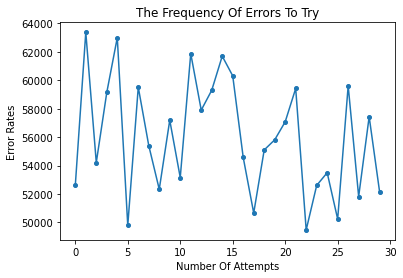

<Figure size 864x864 with 0 Axes>

In [481]:
decide_split_number(X,y,20,30)

# 7. Model Selection 

In the next step, we will select our model, for this we will train the data set with many models. So we can choose one of the models with maximum success. For this we defined class this class has lots of method these methods: fit,predict,error_print. fit_method  purpose is training our model, predict method is predict our validation data. With the error print method, we will be able to calculate the error between our predicted values and our actual values and show them on the screen.

In [421]:
class Model_Selection:
    def __init__(self,model,X,y):
        
        self.model = model
        
        self.x_train,self.x_val,self.y_train,self.y_val = split_dataset(X,y,rate = 0.2)
        
    def fit(self):
        return self.model.fit(self.x_train,self.y_train)
    
    def predict(self):
        return self.model.predict(self.x_val)
    
    def error_print(self,y_pred):
        
        print(f"Model Name: {str(self.model)[:-2]}\nR^2: \t{r2_score(self.y_val,y_pred)}")
        print("Mean Squared Error: {}".format(mean_squared_error(self.y_val,y_pred)))
        print("Root Mean Squared Error: {}".format(mean_squared_error(self.y_val,y_pred,squared=False)))
        print("Mean Absolute Error: {} ".format(mean_absolute_error(self.y_val,y_pred)))
        print("Mean Squared Log Error:{} ".format(mean_squared_log_error(self.y_val,y_pred)))
        print("*"*50)   

In [422]:
# We define what we want to use as the models
model_list = [RandomForestRegressor(),DecisionTreeRegressor(),LinearRegression(),
             LGBMRegressor(),XGBRegressor(),CatBoostRegressor(verbose = 0),SVR()]

for model_name in model_list:
    
    model = Model_Selection(model_name,X,y)
    model.fit()
    y_pred  = model.predict()
    model.error_print(y_pred)

Model Name: RandomForestRegressor
R^2: 	0.8996804790445336
Mean Squared Error: 715473143.0144894
Root Mean Squared Error: 26748.32972382555
Mean Absolute Error: 16365.968732876712 
Mean Squared Log Error:0.02058272998178207 
**************************************************
Model Name: DecisionTreeRegressor
R^2: 	0.8162720143826159
Mean Squared Error: 1310337590.1061645
Root Mean Squared Error: 36198.5854710673
Mean Absolute Error: 24356.174657534248 
Mean Squared Log Error:0.042260113626825135 
**************************************************
Model Name: LinearRegression
R^2: 	0.8198358264103807
Mean Squared Error: 1284920684.519568
Root Mean Squared Error: 35845.7903319144
Mean Absolute Error: 20025.351738424186 
Mean Squared Log Error:0.03032942539809746 
**************************************************
Model Name: LGBMRegressor
R^2: 	0.8829109909872542
Mean Squared Error: 835072182.2923162
Root Mean Squared Error: 28897.615512223776
Mean Absolute Error: 15347.636607717108 
Mea

* Submissions are evaluated on Root-Mean-Squared-Error (RMSE) between the logarithm of the predicted value and the logarithm of the observed sales price.

In [423]:
# Real and for our prediction we take  logarithm separately. 
# We will  the calculate RMSE between each other 
def log_mean_squared_err(y_pred,y_val):
    y_true_log = []
    y_pred_log = []
    for i in y_pred:
        y_pred_log.append(math.log(i))
    for i in y_val:
        y_true_log.append(math.log(i))
    return mean_squared_error(y_pred_log,y_true_log,squared=False)

* Based on these results, we decided to choose XGBRegressor as the model. Next step we will  set the hyperparameters  for XGBRegressor.

In [424]:
xgb = XGBRegressor(learning_rate=0.1,n_jobs=-1,n_estimators=500,max_depth=2,objective='reg:squarederror',
                   colsample_bytree=0.5,colsample_bylevel=0.9,colsample_bynode=0.75,min_child_weight=0.5)

xgb.fit(x_train,y_train)
y_pred = xgb.predict(x_val)

print(f"R^2:{r2_score(y_val,y_pred)}")
print("Mean Squared Error: {}".format(mean_squared_error(y_val,y_pred)))
print("Root Mean Squared Error: {}".format(mean_squared_error(y_val,y_pred,squared=False)))
print("Mean Absolute Error: {} ".format(mean_absolute_error(y_val,y_pred)))
print("Mean Squared Log Error: {} ".format(mean_squared_log_error(y_val,y_pred)))

# Calculating the values in rmse after taking their logarithm
log_rmse = log_mean_squared_err(y_pred,y_val)
print("RMSE Of Logarithmized Values: {}".format(log_rmse))

R^2:0.9374639814359941
Mean Squared Error: 446003343.39180005
Root Mean Squared Error: 21118.791238889597
Mean Absolute Error: 14238.11550192637 
Mean Squared Log Error: 0.014640673245425508 
RMSE Of Logarithmized Values: 0.12099973958392092


# 8. Kfold Cross Validation

In the next step we will train our dataset by applying k-fold cross validation. Thus we can train our model better.Because all dataset can be validation and training dataset. Thus we can evaluate our model more realistically. 

In [452]:
# We will to split dataset to 4 because this way we can training each part of dataset.

kfold = KFold(n_splits=4,shuffle = True,random_state= 10)

log_RMSE  = []
fold_no = 0

for train_idx,val_idx in kfold.split(X):

    x_train,y_train = X[train_idx],y[train_idx]
    x_val,y_val = X[val_idx],y[val_idx]
    
    model = XGBRegressor(learning_rate=0.1,n_jobs=-1,n_estimators=500,max_depth=2,objective='reg:squarederror',
                   colsample_bytree=0.5,colsample_bylevel=0.9,colsample_bynode=0.75,min_child_weight=0.5)
    
    model.fit(x_train,y_train)
    
    y_pred = model.predict(x_val)
    
    log_RMSE.append(log_mean_squared_err(y_pred,y_val))
    
    fold_no += 1
    
    print("Fold No: {}".format(fold_no))
    print("R^2: {}".format(r2_score(y_val,y_pred)))
    print("Mean Squared Error: {}".format(mean_squared_error(y_val,y_pred)))
    print("Root Mean Squared Error: {}".format(mean_squared_error(y_val,y_pred,squared=False)))
    print("Mean Absoluate Error: {}".format(mean_absolute_error(y_pred,y_val)))
    print("Mean Squared Log Error: {}".format(mean_squared_log_error(y_pred,y_val)))

Fold No: 1
R^2: 0.877824151798954
Mean Squared Error: 779504527.4162992
Root Mean Squared Error: 27919.608296254788
Mean Absoluate Error: 17500.5171875
Mean Squared Log Error: 0.019336836248416776
Fold No: 2
R^2: 0.9111217809088284
Mean Squared Error: 606580136.6672518
Root Mean Squared Error: 24628.847652037068
Mean Absoluate Error: 15583.745858304794
Mean Squared Log Error: 0.01679957965606456
Fold No: 3
R^2: 0.8995024700549671
Mean Squared Error: 582223724.0290693
Root Mean Squared Error: 24129.312547792764
Mean Absoluate Error: 14435.42185359589
Mean Squared Log Error: 0.01353311737754085
Fold No: 4
R^2: 0.8623591159066546
Mean Squared Error: 856766724.2664914
Root Mean Squared Error: 29270.57779181155
Mean Absoluate Error: 15522.187136130136
Mean Squared Log Error: 0.01778945421716873


# 9. Prepare Model For Submission

Next step we will predict our test data. For the submission. But fisrtly we training train dataset with our XGBRegressor model. Because we previously trained our model by splitting , if we training whole train dataset our model make better a prediction.

In [476]:
model.fit(X,y) # XGBREGRESSOR
y_pred = model.predict(X)
print("R^2: {}".format(r2_score(y,y_pred)))

R^2: 0.9703071874848037


In [473]:
test_stack = model.predict(test_data.values)

In [474]:
test_id = test_df["Id"]

In [475]:
submission = pd.DataFrame({
        "Id": test_id,
        "SalePrice": test_stack})
submission.to_csv('submission.csv', index=False)